In [377]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.tsa.seasonal import seasonal_decompose
import warnings
warnings.filterwarnings('ignore')

In [654]:

df_seasonality =pd.read_csv('/data/time_series_data.csv' ,index_col='Date')
#df_seasonality.index =pd.to_datetime(df_seasonality.index)

In [656]:
df_trend =pd.read_csv('/data/time_series_trend.csv' ,index_col='index')



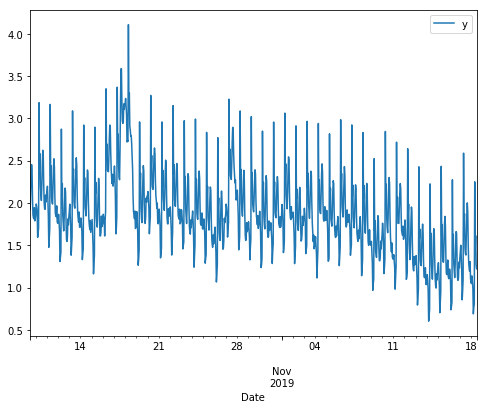

In [530]:
df_seasonality.plot(figsize=(8,6))


## Seasonal Decompose

Seasonal decompose help us to extract multiple components from a Time series data. It help us to get the insight of the data.
Basically it extract Seasonal, Trend and Residual components.



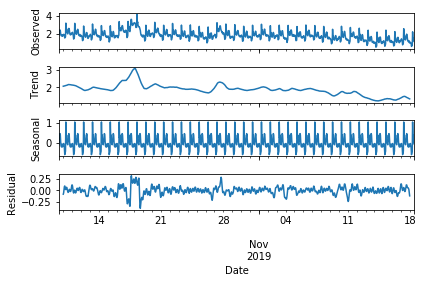

In [531]:
sd =seasonal_decompose(df_seasonality,freq=24)
sd.plot();

## Train Test split

split data in Train and test so we can test our model on the actual data

In [535]:
train = df_seasonality[:'2019-11-13']
test  = df_seasonality['2019-11-14':]
#train.tail(3), test.head(3)

## Mooving Average 

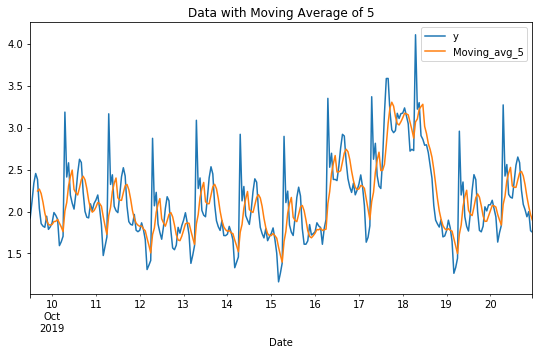

In [624]:
## Moving Average wiht window size of 5
df =df_seasonality.copy()
figsize=(9,5)
df['Moving_avg_5'] =df.rolling(5).mean()
df[:'2019-10-20'].plot(figsize=figsize)
plt.title("Data with Moving Average of 5" );

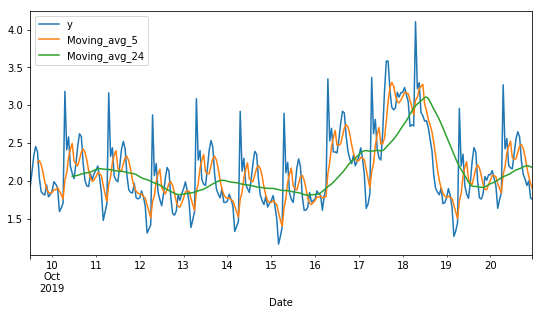

In [620]:
df['Moving_avg_24'] =df.y.rolling(24).mean()
df[:'2019-10-20'].plot(figsize=figsize)
#plt.title("Data with Moving Average of 5 & Moving Average of 24" );

## Single Exponential Smoothing

In [536]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [537]:
## Smoothing_level which is the value of alpha which is responsible for level smoothing. 
## here we can provid parameters like {smoothing_level,optimized}
## you can define your own smoothing_level values between 0 and 1 .
## as it is simple exponential smoothing we will have only level as a parameter because SES predict  the level only.
## SimpleExpSmoothing().fit() will automaticaly train the model on best parameters.

ses = SimpleExpSmoothing(train).fit()

In [ ]:
forecast_ses = pd.DataFrame(ses.forecast(24).rename('forecast'))


Text(0.5, 1.0, 'Single Exponential Smoothing Forecast')

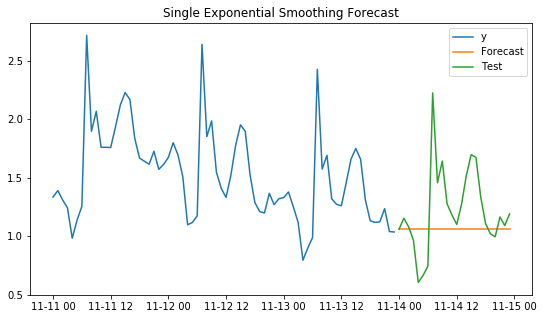

In [625]:
plt.figure(figsize=figsize)
plt.plot(train.y[-24*3:])
plt.plot(forecast_ses ,label ='Forecast')
plt.plot(test[:len(forecast_ses)] ,label ='Test')
plt.legend()
plt.title("Single Exponential Smoothing Forecast")

In [547]:
## Checking parameters which are selected by the model
ses.params

{'smoothing_level': 0.5983684967968433,
 'smoothing_slope': nan,
 'smoothing_seasonal': nan,
 'damping_slope': nan,
 'initial_level': 2.040589854837388,
 'initial_slope': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [553]:
## as
ses.slope.sum()

0.0

## Double exponential smoothing

In [631]:
from statsmodels.tsa.holtwinters import Holt

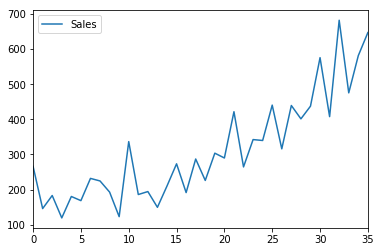

In [558]:
df_trend.plot()


In [560]:
des =  Holt(df_trend.Sales).fit(optimized=True)

In [561]:
des.params

{'smoothing_level': 0.47368421052631576,
 'smoothing_slope': 0.47368421052631576,
 'smoothing_seasonal': nan,
 'damping_slope': nan,
 'initial_level': 266.0,
 'initial_slope': 0.0,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [567]:
#des_pred =des.predict(start=len(df_trend) ,end= len(df_trend)+10).rename('Pred')
des_fcst =des.forecast(10).rename('Forecast')

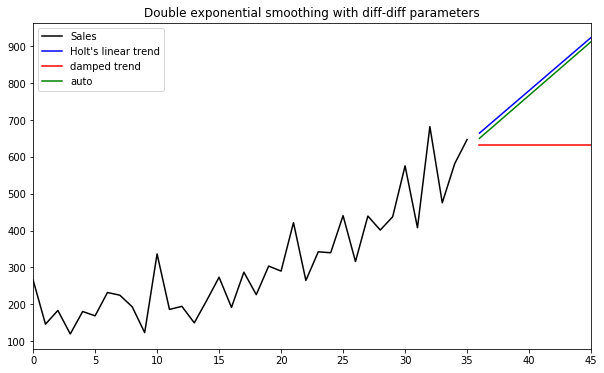

In [633]:
## damped == he forecasts generated by Holt’s linear method display a
##constant trend (increasing or decreasing) indefinitely into the future
##Empirical evidence indicates that these methods tend to over-forecast, especially for longer forecast horizons
## parameter that “dampens” the trend to a flat line some time in the future.
des_1 = Holt(df_trend).fit(smoothing_level=0.8, smoothing_slope=0.2, optimized=False)
fcast_1 = des_1.forecast(10).rename("Holt's linear trend")

des_2 = Holt(df_trend, damped=True).fit(smoothing_level=0.8, smoothing_slope=0.2)
fcast_2 = des_2.forecast(10).rename("damped trend")

des_3 = Holt(df_trend).fit()
fcast_3 = des_3.forecast(10).rename("auto")

figsize=(10,6)
ax = df_trend.plot(color="black",  figsize=(figsize))
#fit1.fittedvalues.plot(ax=ax, color='blue')

fcast_1.plot(ax=ax, color='blue',legend=True)
#fit2.fittedvalues.plot(ax=ax, color='red')
fcast_2.plot(ax=ax, color='red', legend=True)
#fit3.fittedvalues.plot(ax=ax, color='green')
fcast_3.plot(ax=ax, color='green', legend=True)
#fit4.fittedvalues.plot(ax=ax, color='k')
#fcast_4.plot(ax=ax, color='k', marker="o", legend=True)

plt.title("Double exponential smoothing with diff-diff parameters")
plt.show()

## Triple exponential smoothing a.k.a. Holt-Winters

In [583]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [588]:
tes =ExponentialSmoothing(train.y,seasonal_periods=24,seasonal='add').fit(optimized=True)
#parameters we need to pass
##Trend= 'Add' or 'mul' if the data have Trend
##seasonal = 'Add' or 'mul' if the data have Seasones
## seasonal_periods=24  total length of  one season , it is the sample size in a single season , eg - we have daily seasinoaliyt and we have 
## hourly data so our seasonality is 24
## in fit function 
##

In [589]:
## Single Exp smoothing test

tes_fcast =tes.forecast(len(test)).rename('forecast')

In [590]:
tes_fcast

2019-11-14 00:00:00    1.074808
2019-11-14 01:00:00    1.169219
2019-11-14 02:00:00    1.079953
2019-11-14 03:00:00    0.964370
2019-11-14 04:00:00    0.640860
                         ...   
2019-11-18 07:00:00    2.322745
2019-11-18 08:00:00    1.529359
2019-11-18 09:00:00    1.687503
2019-11-18 10:00:00    1.319284
2019-11-18 11:00:00    1.253329
Freq: H, Name: forecast, Length: 108, dtype: float64

[]

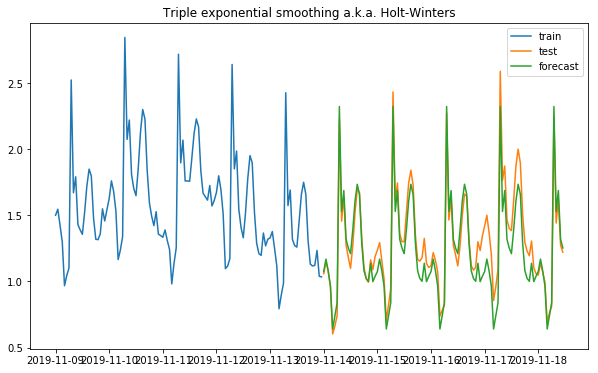

In [630]:
plt.figure(figsize=figsize)
plt.plot(train.y[-24*5:] ,label='train')
plt.plot(test.y ,label ='test')
plt.plot(tes_fcast , label='forecast')
plt.legend()
plt.title('Triple exponential smoothing a.k.a. Holt-Winters')
plt.plot()


In [595]:
tes.params

{'smoothing_level': 0.894736842105263,
 'smoothing_slope': nan,
 'smoothing_seasonal': 0.10526315789473684,
 'damping_slope': nan,
 'initial_level': 1.831630120981108,
 'initial_slope': nan,
 'initial_seasons': array([ 0.15584778,  0.31546223,  0.53061782,  0.65966483,  0.58500389,
         0.22390355,  0.01242272, -0.04186633, -0.04737646,  0.11043725,
        -0.00888417,  0.04228581,  0.09331105,  0.19491871,  0.10467678,
        -0.01470995, -0.33245552, -0.22249316, -0.11964553,  1.35197599,
         0.5339781 ,  0.66545373,  0.27793328,  0.19364435]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}